# **Project Name : ✨ Mall Customers Analysis ✨**

AUTHOR : **Jamshed Butt** from **Data Science**

**Introduction :**

This notebook explores customer segmentation and analysis based on a dataset from a shopping mall. The dataset includes customer information, such as age, annual income, and spending score, along with unique identifiers and gender.

**Dataset Overview**

**CustomerID:** A unique identifier for each customer.

**Gender:** Customer gender (Male or Female).

**Age:** Customer age.

**Annual Income (k$):** Customer annual income in thousands of dollars.

**Spending Score (1-100):** A score reflecting customer spending behavior and habits.

**Purpose**

The goal of this analysis is to cluster customers based on their attributes and behavior. By segmenting customers, we aim to gain insights into their preferences and tailor marketing strategies to improve customer satisfaction and optimize business operations.

# **Import Libraries**

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

from sklearn.preprocessing import LabelEncoder, StandardScaler

#Model
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

# **Load Dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Mall_Customers/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [7]:
df.rename(columns = {'Genre':'Gender'}, inplace = True)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# **Univariate Analysis**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


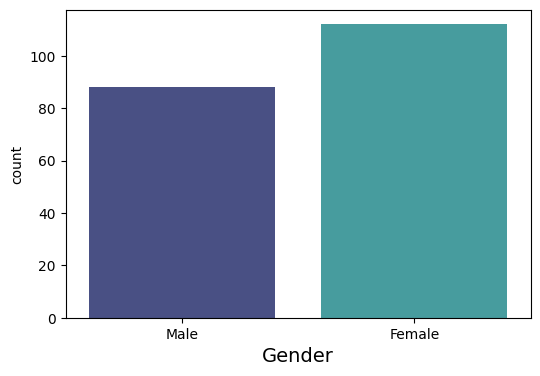

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="mako")
plt.xlabel("Gender", fontsize=14)
plt.show()

<ipython-input-11-f2968f390614>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual Income (k$)"], kde=True, color="orange", bins=10)


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

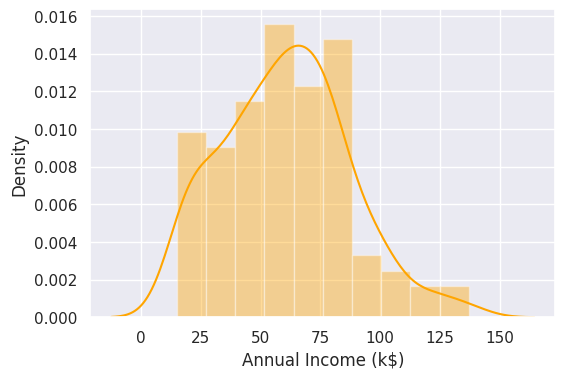

In [11]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Annual Income (k$)"], kde=True, color="orange", bins=10)

<ipython-input-12-511f0157ff88>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], kde=True, color="orange", bins=10)


<Axes: xlabel='Age', ylabel='Density'>

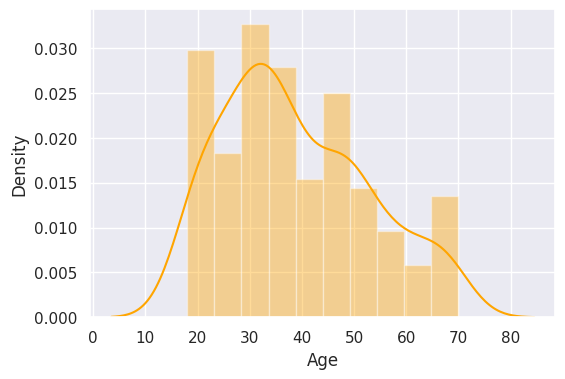

In [12]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Age"], kde=True, color="orange", bins=10)

<ipython-input-13-3765b8f0404d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Spending Score (1-100)"], kde=True, color="orange", bins=10)


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

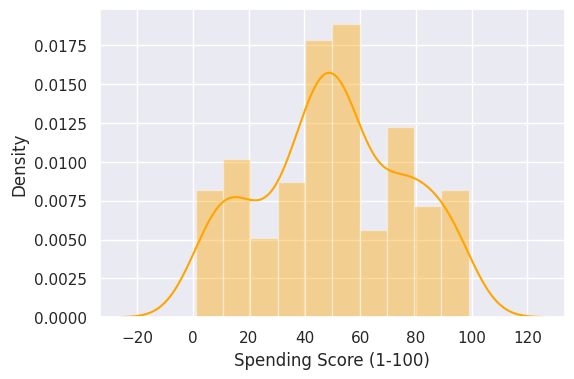

In [13]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Spending Score (1-100)"], kde=True, color="orange", bins=10)

# **EDA (Exploratory Data Analysis)**

#### **Remove Duplicate**

In [14]:
duplicated = df.duplicated()
print(duplicated.sum())

0


#### **Check And Remove NaN Values**

In [15]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### **Remove Outlier**

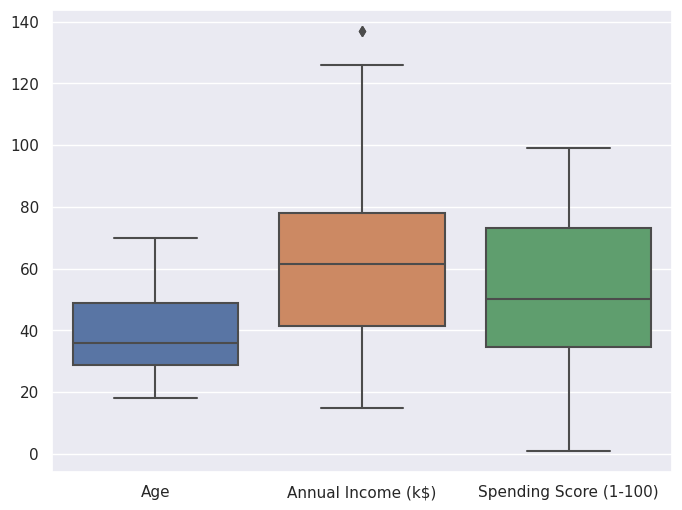

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

In [17]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [18]:
lower_range,upper_range = remove_outlier(df["Annual Income (k$)"])
df["Annual Income (k$)"] = np.where(df["Annual Income (k$)"] > upper_range, upper_range, df["Annual Income (k$)"])
df["Annual Income (k$)"] = np.where(df["Annual Income (k$)"] < lower_range, lower_range, df["Annual Income (k$)"])

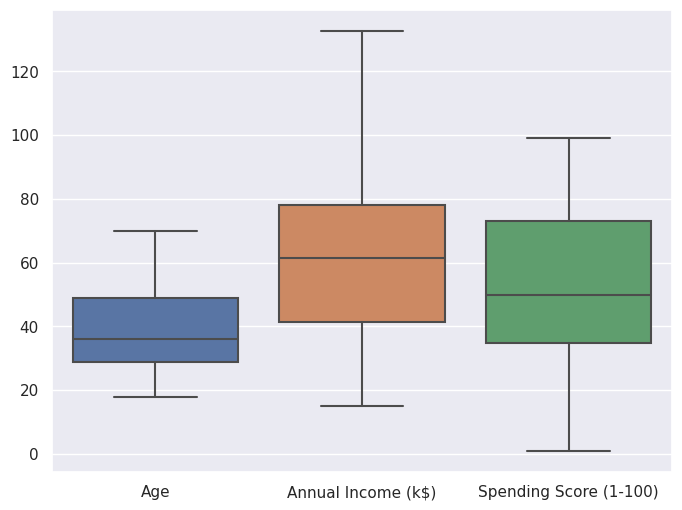

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

#### **Bivariate Analysis**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    object 
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    float64
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


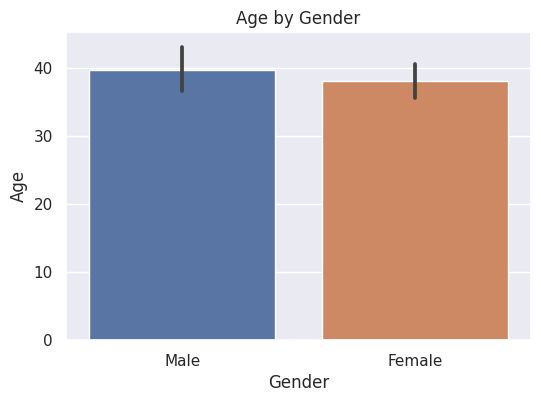

In [21]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Age', data=df)
plt.title('Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

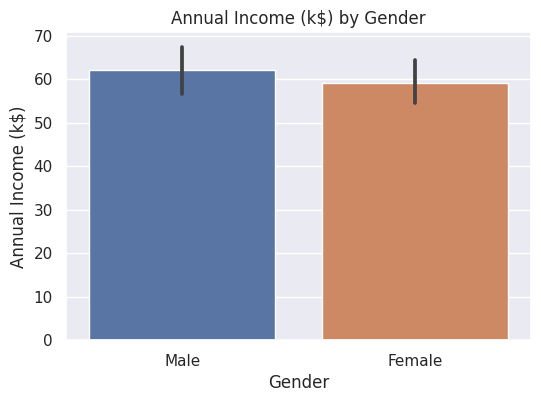

In [22]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Annual Income (k$) by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()

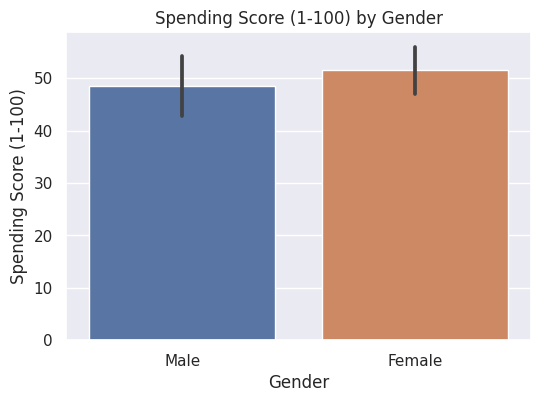

In [23]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score (1-100) by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

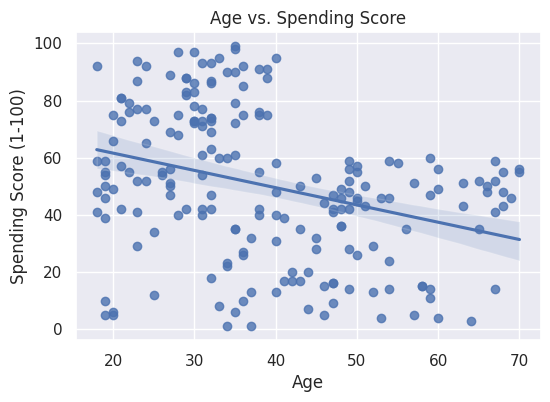

In [117]:
sns.regplot(x='Age', y='Spending Score (1-100)', data=df, color='b')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs. Spending Score')
plt.show()

<ipython-input-24-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


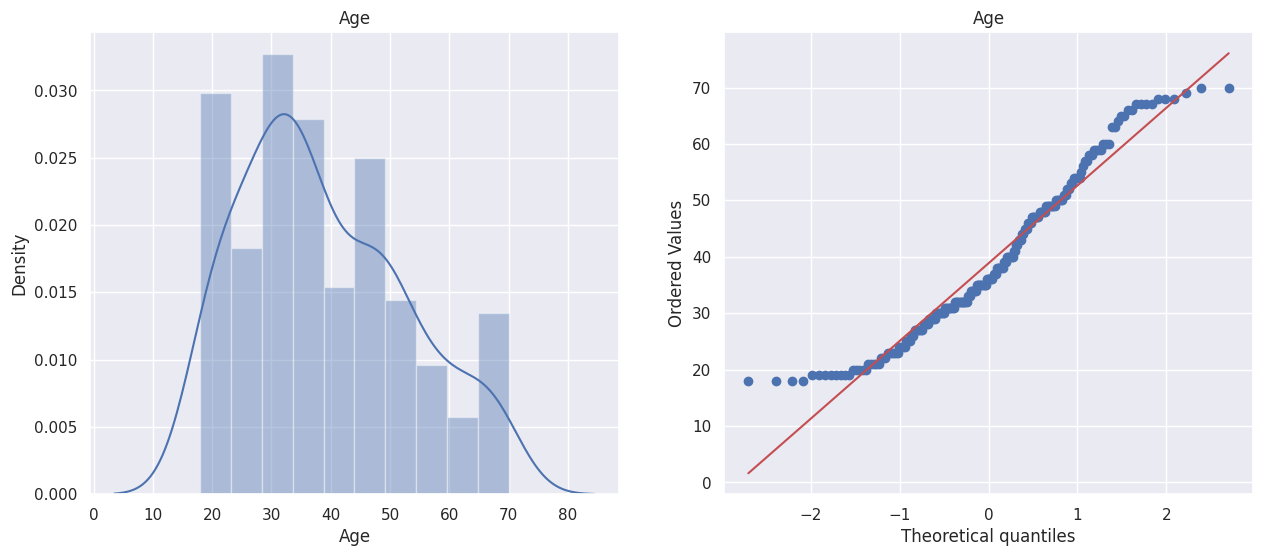

<ipython-input-24-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


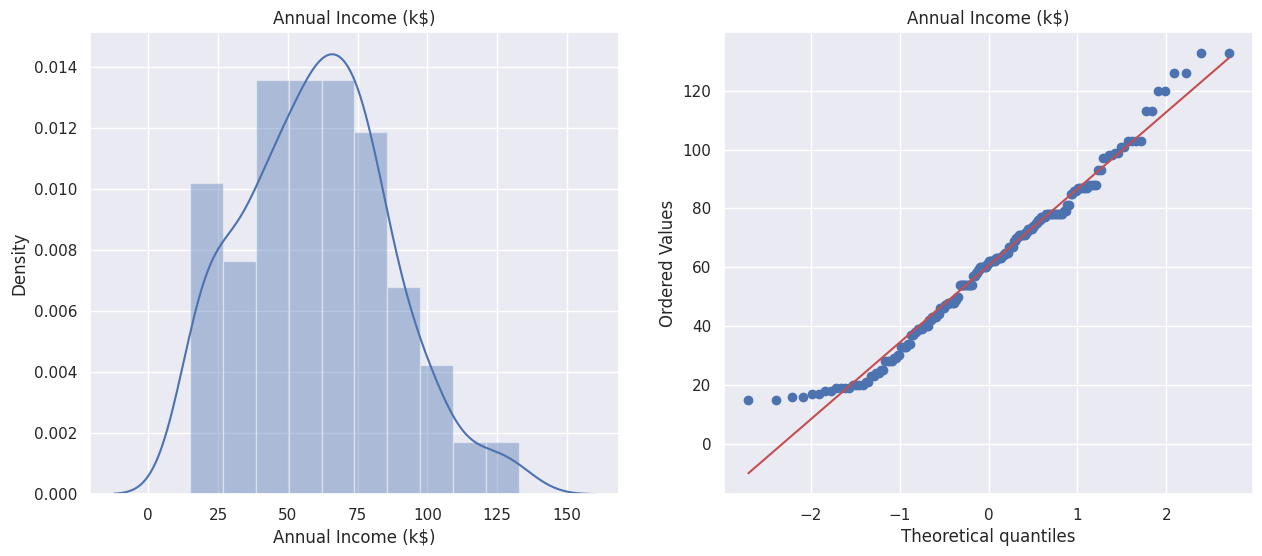

<ipython-input-24-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


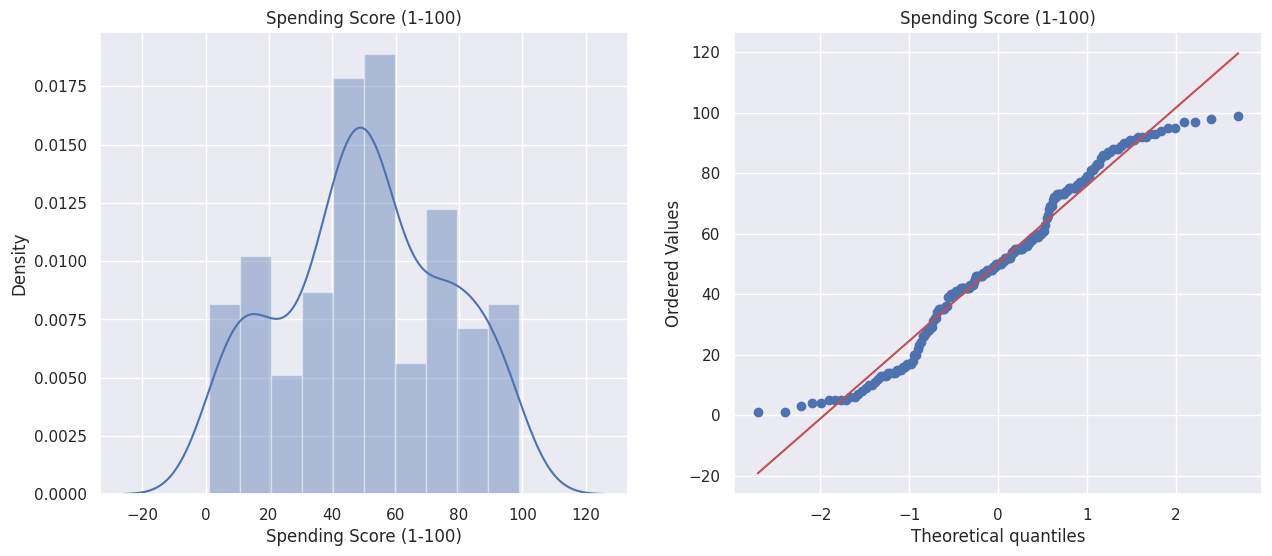

In [24]:
num_cols = df.select_dtypes(include=["int64","float64"])
def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #num_cols[variable].hist()
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in num_cols.columns:
  plots(num_cols, i)

<ipython-input-25-50c0f90b2df7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)


<Axes: >

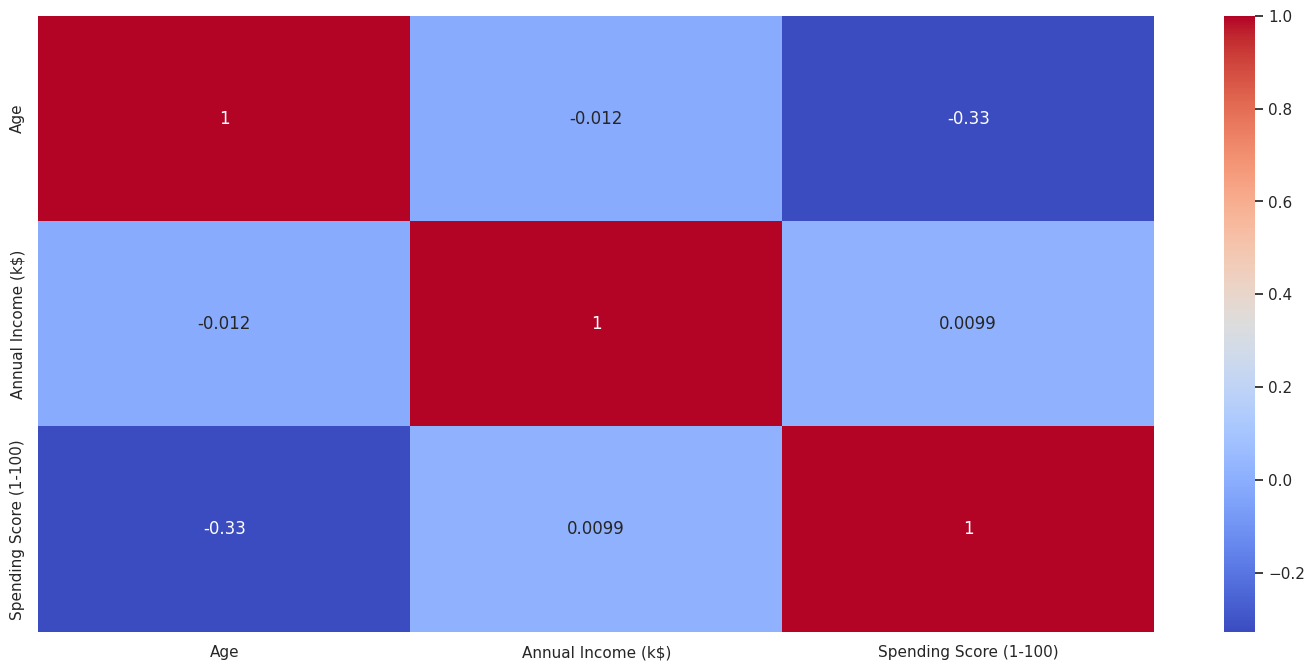

In [25]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)

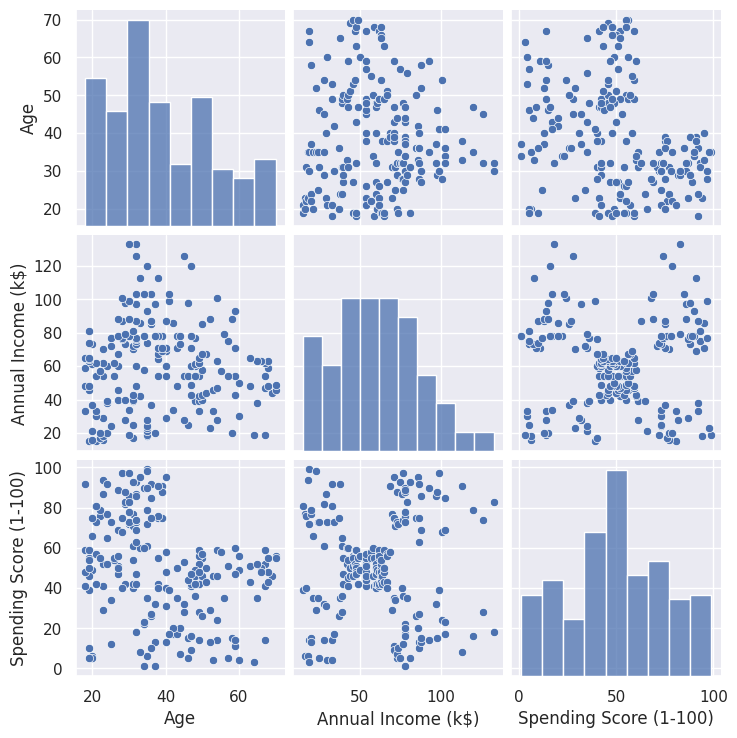

In [26]:
sns.pairplot(df)
plt.show()

#### **Drop Columns that are not used further**

In [40]:
X = df.iloc[:,[2,3]]

In [41]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15.0,39
1,15.0,81
2,16.0,6
3,16.0,77
4,17.0,40


# **Feature Engineering**

#### **Normalizing Data**

In [76]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [77]:
X

array([[-1.74542941, -0.43480148],
       [-1.74542941,  1.19570407],
       [-1.70708307, -1.71591298],
       [-1.70708307,  1.04041783],
       [-1.66873673, -0.39597992],
       [-1.66873673,  1.00159627],
       [-1.6303904 , -1.71591298],
       [-1.6303904 ,  1.70038436],
       [-1.59204406, -1.83237767],
       [-1.59204406,  0.84631002],
       [-1.59204406, -1.4053405 ],
       [-1.59204406,  1.89449216],
       [-1.55369772, -1.36651894],
       [-1.55369772,  1.04041783],
       [-1.55369772, -1.44416206],
       [-1.55369772,  1.11806095],
       [-1.51535138, -0.59008772],
       [-1.51535138,  0.61338066],
       [-1.43865871, -0.82301709],
       [-1.43865871,  1.8556706 ],
       [-1.40031237, -0.59008772],
       [-1.40031237,  0.88513158],
       [-1.36196603, -1.75473454],
       [-1.36196603,  0.88513158],
       [-1.24692702, -1.4053405 ],
       [-1.24692702,  1.23452563],
       [-1.24692702, -0.7065524 ],
       [-1.24692702,  0.41927286],
       [-1.20858069,

# **Model**

#### **KMean Model**

In [79]:
wscc = []

In [80]:
for i in range(1,11):
  model_kmean = KMeans(n_clusters=i,init="k-means++",random_state=0)
  model_kmean.fit(X)
  wscc.append(model_kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

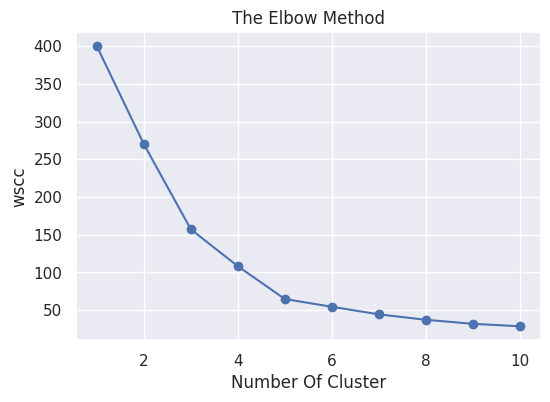

In [81]:
plt.plot(range(1,11),wscc, marker = 'o')
plt.title("The Elbow Method")
plt.xlabel("Number Of Cluster")
plt.ylabel("wscc")
plt.show()



In [82]:
model_kmean = KMeans(n_clusters=5,random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [83]:
y_cluster = model_kmean.predict(X)

In [84]:
y_cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [86]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_cluster)

0.5555014501078793

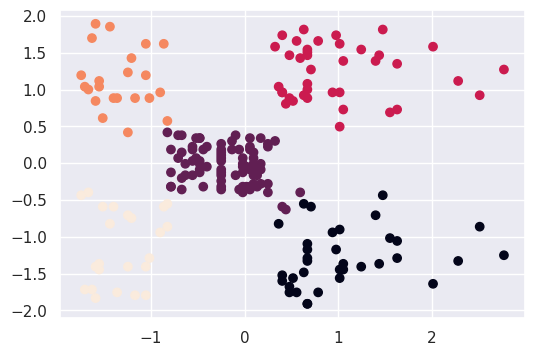

In [85]:
plt.scatter(X[:,0], X[:,1], c=y_cluster)

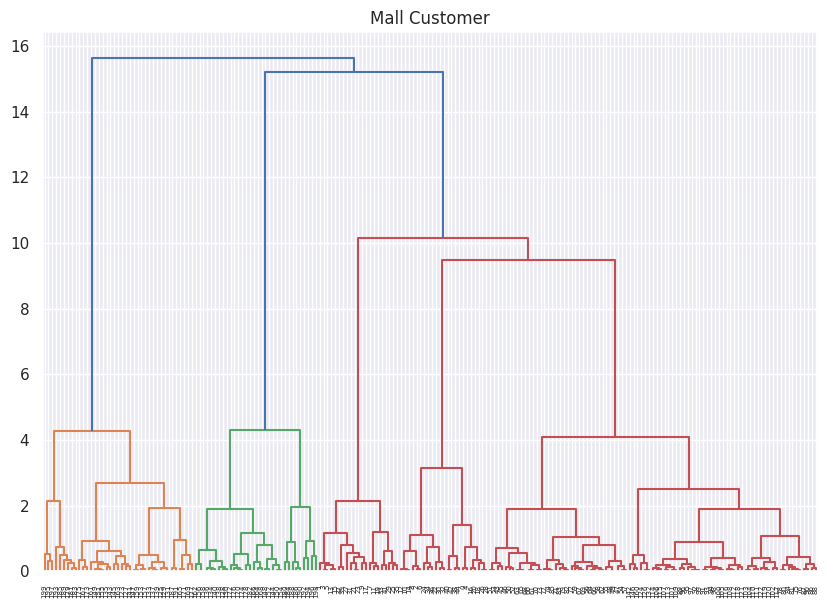

In [87]:
# Another Way To Used Linkage Metrics
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title("Mall Customer")
dend = dendrogram(linkage(X,method="ward"))

<Axes: >

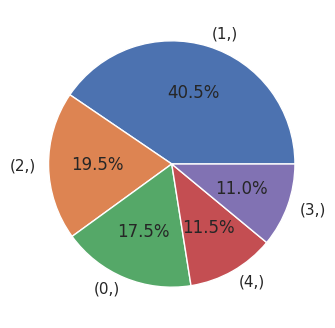

In [114]:
y_cluster = pd.DataFrame(y_cluster)
y_cluster.value_counts().plot.pie(autopct= '%.1f%%')

#### **Agglomerative Clustering**

In [99]:
model_agg = AgglomerativeClustering(n_clusters=5)

In [100]:
y_pred = model_kmean.predict(X)

In [101]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [102]:
silhouette_score(X, y_pred)

0.5555014501078793

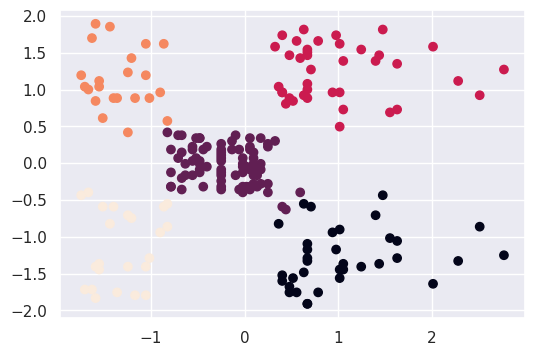

In [103]:
plt.scatter(X[:,0], X[:,1], c=y_pred)

<Axes: >

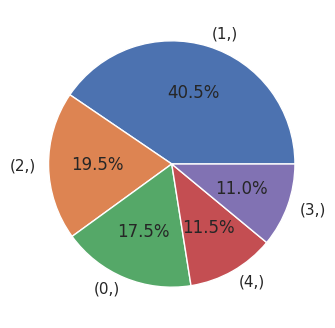

In [113]:
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts().plot.pie(autopct= '%.1f%%')